In [1]:
from pysymbolic.algorithms.symbolic_metamodeling import *
import numpy as np
import pandas as pd

In [2]:
path = './'
file_name = 'COVID_V7.xlsx'
full_file_path = path + file_name

In [3]:
#from preprocess import clean_data
all_data = pd.read_excel(full_file_path, sheet_name='Sheet1')
print('all_data len:', len(all_data.index))
print('all_data columns len:', len(all_data.columns))

all_data len: 538
all_data columns len: 26


In [4]:
col_type_dict = {'Age':True, 'SEX':True, 'BMI':False, 'Prior_Co1':True, 'Prior_Co2':True, 'Prior_Co3':True, 'Prior_Co6':True,
       'Prior_Co24':True, 'Alco':True, 'Smoke':True, 'SYMP1':True, 'SYMP2':True, 'SYMP3':True, 'SYMP5':True,
       'SYMP6':True, 'SYMP11':True, 'SYMP12':True, 'SYMP20':True, 'SPO':False, 'WBC':False, 'Hgb':False,
       'Hct':False, 'MCV':False, 'Plate':False, 'Neutro':False, 'Lymp':False, 'DIMER':True, 'Glucose':True, 'BUN':True,
       'CR':False, 'GFR_BIN':True, 'AKI':True, 'NA_I':True, 'K_I':False, 'BIC':False, 'ALB_I':False, 'TBILI':False, 'ALK_I':True,
       'ALT_I':True, 'AST_I':True, 'Trop_BIN':True, 'CRP':False, 'CXR2':True, 'CXR6':True, 'CXR7':True, 'EKG':True,
       'SEVER':True, 'RACE_E':True, 'LENG':True, 'LENG_ICU':True, 'Mech':True, 'DIED':True, 'ICU':True}

(array([472.,  13.,  15.,   7.,   7.,   0.,   1.,   4.,   1.,  18.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

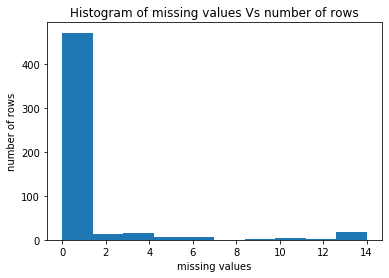

In [5]:
import matplotlib.pyplot as plt
tgt_col='SEVER'
died_col = 'DIED'
icu_col = 'ICU'
sever_col = 'SEVER'
mech_col = 'Mech'
leng_col = 'LENG'
leng_icu_col = 'LENG_ICU'
#spol_col = 'SPO'
#result_cols = [died_col, icu_col, sever_col, mech_col, leng_col, leng_icu_col, spol_col]
result_cols = [died_col, icu_col, sever_col, mech_col, leng_col, leng_icu_col]
result_cols.remove(tgt_col)
features = np.setdiff1d(all_data.columns,  result_cols).tolist()
all_data = all_data[features]



plt.xlabel('missing values')
plt.ylabel('number of rows')
plt.title('Histogram of missing values Vs number of rows' )
plt.hist(all_data.isnull().sum(axis=1).tolist())


In [6]:
thresh3_val = 0
df = all_data[all_data.isnull().sum(axis=1) > thresh3_val ].index
print('len df', len(df))
all_data.drop(all_data.index[df], inplace=True)
all_data.reset_index(drop=True, inplace=True)

len df 146


In [7]:
all_data['EKG']

0      422.0
1      448.0
2      385.0
3      449.0
4      544.0
       ...  
387    439.0
388    444.0
389    421.0
390    453.0
391    423.0
Name: EKG, Length: 392, dtype: float64

In [8]:
all_data
normalization_not_required = {'Age':False, 'SEX':True, 'BMI':False, 'Prior_Co1':True, 'Prior_Co2':True, 'Prior_Co3':True, 'Prior_Co6':True,
       'Prior_Co24':True, 'Alco':True, 'Smoke':True, 'SYMP1':True, 'SYMP2':True, 'SYMP3':True, 'SYMP5':True,
       'SYMP6':True, 'SYMP11':True, 'SYMP12':True, 'SYMP20':True, 'SPO':False, 'WBC':False, 'Hgb':False,
       'Hct':False, 'MCV':False, 'Plate':False, 'Neutro':False, 'Lymp':False, 'DIMER':False, 'Glucose':False, 'BUN':False,
       'CR':False, 'GFR_BIN':True, 'AKI':True, 'NA_I':False, 'K_I':False, 'BIC':False, 'ALB_I':False, 'TBILI':False, 'ALK_I':False,
       'ALT_I':False, 'AST_I':False, 'Trop_BIN':True, 'CRP':False, 'CXR2':True, 'CXR6':True, 'CXR7':True, 'EKG':False,
       'SEVER':True, 'RACE_E':False, 'LENG':True, 'LENG_ICU':True, 'Mech':True, 'DIED':True, 'ICU':True}

In [9]:
from sklearn.preprocessing import MinMaxScaler
# normalize the features
scale_feas = []
for col in all_data.columns:
    if normalization_not_required[col] is False:
        scale_feas.append(col)
#print(scale_feas)
all_data_temp = all_data.copy()
features = all_data_temp[scale_feas]
#scaler = StandardScaler().fit(features.values)
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
all_data[scale_feas] = features
#print(all_data)

In [10]:
len(all_data.index)
all_data

,AKI,ALB_I,ALK_I,AST_I,Age,BUN,CR,CXR2,DIMER,EKG,...,Glucose,Hct,MCV,NA_I,Prior_Co1,RACE_E,SEVER,SYMP20,TBILI,WBC
0,1.0,0.101010,0.037202,0.008299,0.395062,0.350649,0.186335,1,0.013409,0.095002,...,0.029436,0.356061,0.511078,0.322034,1,1.000000,1,0,0.057143,0.128114
1,1.0,0.117845,0.089286,0.048409,0.666667,0.311688,0.099379,0,0.001759,0.100855,...,0.061325,0.553030,0.604136,0.237288,1,1.000000,1,0,0.085714,0.106762
2,1.0,0.094276,0.037202,0.134855,0.802469,0.142857,0.062112,1,0.009140,0.086673,...,0.026165,0.608586,0.562777,0.322034,1,1.000000,1,0,0.057143,0.252669
3,1.0,0.090909,0.043155,0.017981,0.777778,0.064935,0.043478,0,0.012345,0.101081,...,0.031889,0.530303,0.638109,0.203390,1,0.000000,1,0,0.142857,0.405694
4,1.0,0.114478,0.241071,0.168050,0.604938,0.032468,0.043478,1,0.005723,0.122467,...,0.024530,0.141414,0.379616,0.254237,0,1.000000,1,0,1.000000,0.060498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,1.0,0.097643,0.110119,0.015214,0.543210,0.402597,0.298137,0,0.005833,0.098829,...,0.080131,0.381313,0.601182,0.288136,1,0.000000,0,0,0.028571,0.170819
388,0.0,0.107744,0.035714,0.035961,0.518519,0.019481,0.031056,1,0.003589,0.099955,...,0.053148,0.530303,0.567208,0.305085,1,0.666667,0,0,0.057143,0.185053
389,0.0,0.084175,0.071429,0.023513,0.901235,0.123377,0.062112,1,0.062618,0.094777,...,0.088307,0.454545,0.552437,0.288136,1,0.000000,0,0,0.085714,0.160142
390,0.0,0.101010,0.110119,0.004841,0.506173,0.045455,0.024845,1,0.001830,0.101981,...,0.225675,0.631313,0.542097,0.372881,0,0.000000,0,0,0.200000,0.252669


In [11]:
len(all_data.columns)

21

In [12]:
y = all_data[tgt_col].copy()
all_data.drop(columns=[tgt_col], inplace=True)
X = all_data.copy()

In [13]:
from sklearn.model_selection import train_test_split
seed = 19
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [14]:
len(X_train)

274

In [15]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,
#                       random_state=0, shuffle=False)
model = RandomForestClassifier(max_depth=6, random_state=0)
model.fit(X_train, y_train)

#print(regr.predict([[0, 0, 0, 0]]))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Let us examine the AUC-ROC performance of the fitted XGBoost model on the test data

In [16]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.8285907859078591

Now let us create a symbolic metamodel instance. This takes the fitted model **model** and the training features **X_train** as follows

In [18]:
metamodel = symbolic_metamodel(model, X_train)

#metamodel.fit(num_iter=10, batch_size=X_train.shape[0], learning_rate=.01)
metamodel.fit(num_iter=100, batch_size=X_train.shape[0], learning_rate=.001)

---- Tuning the basis functions ----



----  Optimizing the metamodel  ----


Now let us see how this metamodel performs using the **evaluate** method...

In [19]:
Y_metamodel = metamodel.evaluate(X_test)

roc_auc_score(y_test, Y_metamodel)

0.7899728997289973

It performs close to the original XGBoost model! Now let us see the exact symbolic equation of the model in terms of Meijer-G functions

By invoking the **.fit()** method in the **symbolic_metamodel** class, we essentially transform the XGBoost model to a space of interpretable symbolic equations as shown in the Figure below, without much loss in predictive accuracy. 

<img src="images/FigB2.png" width="320"/>

Now we show how to extract the exact and approximate equation $g(x)$ from the metamodel class...

In [20]:
from sklearn.metrics import mean_squared_error 
print("Test MSE score for the MLP Regressor: ", mean_squared_error(y_test, model.predict(X_test)))
print("Test MSE score for the Symbolic Regressor: ", mean_squared_error(y_test, metamodel.evaluate(X_test)))

Test MSE score for the MLP Regressor:  0.2796610169491525
Test MSE score for the Symbolic Regressor:  0.17289428534146317


In [21]:
print("Train MSE score for the MLP Regressor: ", mean_squared_error(y_train, model.predict(X_train)))
print("Train MSE score for the Symbolic Regressor: ", mean_squared_error(y_train, metamodel.evaluate(X_train)))

Train MSE score for the MLP Regressor:  0.025547445255474453
Train MSE score for the Symbolic Regressor:  0.12375558680565865


In [22]:
metamodel.evaluate(X_test)

array([0.76952012, 0.5791048 , 0.27209104, 0.03100126, 0.1268828 ,
       0.51503312, 0.5144703 , 0.33587415, 0.43924615, 0.16350214,
       0.4213692 , 0.39428915, 0.48114106, 0.43460801, 0.63595546,
       0.23988751, 0.07025528, 0.45182026, 0.07023515, 0.47389379,
       0.11452754, 0.54436285, 0.03561501, 0.81270286, 0.44017668,
       0.48960941, 0.42561818, 0.03785822, 0.45731817, 0.54465201,
       0.65329742, 0.11524195, 0.40929454, 0.78313453, 0.3734869 ,
       0.2117023 , 0.19735488, 0.05192253, 0.04730264, 0.03579853,
       0.67062645, 0.46269396, 0.21905745, 0.07959137, 0.60847532,
       0.08538979, 0.05466906, 0.08344109, 0.43535961, 0.86495996,
       0.57185272, 0.37921458, 0.2059042 , 0.17532534, 0.22060077,
       0.46733519, 0.15448971, 0.51742814, 0.04887003, 0.03646753,
       0.96371278, 0.32656299, 0.12343112, 0.06356875, 0.52839774,
       0.50162293, 0.6711065 , 0.13093557, 0.1055864 , 0.14983974,
       0.37908717, 0.29364605, 0.4686055 , 0.06967146, 0.39822

In [23]:
metamodel.exact_expression

1/(exp(-1.88148160922589e-14*re(X0**2.20859363014468*hyper((1.0, 1.0), (2.2881245630521,), 0.000453518890663715*X0*exp_polar(I*pi))) - 0.000795060156153291*re(X1**2.53311767607129*hyper((1.0, 1.0), (2.65409044802407,), 0.234497952122279*X1*exp_polar(I*pi))) + 6.16670471800576e-27*re(X10**2.20433681461525*hyper((1.0, 1.0), (2.28181977800971,), 1.01705942492339e-6*X10*exp_polar(I*pi))) - 0.012782123613925*re(X11**2.53306073691538*hyper((1.0, 1.0), (2.63003084759272,), 0.501546450474915*X11*exp_polar(I*pi))) - 3.88600894577565e-19*re(X12**2.35080318858265*hyper((1.0, 1.0), (2.46642371725987,), 8.17383012803499e-5*X12*exp_polar(I*pi))) - 7.72429269641186e-19*re(X13**2.35742035028269*hyper((1.0, 1.0), (2.47359320601046,), 0.000111645673568459*X13*exp_polar(I*pi))) + 5.39187218604586e-10*re(X14**2.49296485802486*hyper((1.0, 1.0), (2.61946241292935,), 0.0158695034081091*X14*exp_polar(I*pi))) - 4.04283447731301e-21*re(X16**2.299003124099*hyper((1.0, 1.0), (2.40228906820767,), 1.84761128743575e

Because this equation involves Hypergeometric functions, we might prefer to work with the polynomial approximation...

In [24]:
metamodel.approx_expression

1/(5.62523489241111*exp(0.22964022624237*X0**3*X1**3 - 0.0480208707080818*X0**3*X10**3 + 0.256794469124247*X0**3*X11**3 + 0.188646826611872*X0**3*X12**3 + 0.109656179402738*X0**3*X13**3 + 0.124428493025624*X0**3*X14**3 - 0.0518833114667007*X0**3*X15**3 + 0.0433966295148399*X0**3*X16**3 - 0.0522221096313304*X0**3*X17**3 + 0.0602948343336755*X0**3*X18**3 - 0.085162168583849*X0**3*X19**3 + 0.0210203660373342*X0**3*X2**3 - 0.0978728941306743*X0**3*X3**3 - 0.0793491635274788*X0**3*X4**3 - 0.229164341619562*X0**3*X5**3 - 0.0221090976785639*X0**3*X6**3 + 0.036151389088168*X0**3*X7**3 - 0.071782523833539*X0**3*X8**3 + 0.00536094099529416*X0**3*X9**3 - 3.01731544450169e-15*X0**3 - 0.103715424304998*X0**2*X1**2 + 0.021372478972072*X0**2*X10**2 - 0.115478734412928*X0**2*X11**2 - 0.086768703118735*X0**2*X12**2 - 0.0525027201998925*X0**2*X13**2 - 0.0578034858264067*X0**2*X14**2 + 0.0214542260415199*X0**2*X15**2 - 0.0148736833627166*X0**2*X16**2 + 0.0218403342187143*X0**2*X17**2 - 0.0277698320675799

In [25]:
#import matplotlib.pyplot as plt
# get importance
#get_feature_importance(X_train[0])
from sympy.printing.latex import latex
latex(metamodel.approx_expression)

'\\frac{1}{5.62523489241111 e^{0.22964022624237 X_{0}^{3} X_{1}^{3} - 0.0480208707080818 X_{0}^{3} X_{10}^{3} + 0.256794469124247 X_{0}^{3} X_{11}^{3} + 0.188646826611872 X_{0}^{3} X_{12}^{3} + 0.109656179402738 X_{0}^{3} X_{13}^{3} + 0.124428493025624 X_{0}^{3} X_{14}^{3} - 0.0518833114667007 X_{0}^{3} X_{15}^{3} + 0.0433966295148399 X_{0}^{3} X_{16}^{3} - 0.0522221096313304 X_{0}^{3} X_{17}^{3} + 0.0602948343336755 X_{0}^{3} X_{18}^{3} - 0.085162168583849 X_{0}^{3} X_{19}^{3} + 0.0210203660373342 X_{0}^{3} X_{2}^{3} - 0.0978728941306743 X_{0}^{3} X_{3}^{3} - 0.0793491635274788 X_{0}^{3} X_{4}^{3} - 0.229164341619562 X_{0}^{3} X_{5}^{3} - 0.0221090976785639 X_{0}^{3} X_{6}^{3} + 0.036151389088168 X_{0}^{3} X_{7}^{3} - 0.071782523833539 X_{0}^{3} X_{8}^{3} + 0.00536094099529416 X_{0}^{3} X_{9}^{3} - 3.01731544450169 \\cdot 10^{-15} X_{0}^{3} - 0.103715424304998 X_{0}^{2} X_{1}^{2} + 0.021372478972072 X_{0}^{2} X_{10}^{2} - 0.115478734412928 X_{0}^{2} X_{11}^{2} - 0.086768703118735 X_{0

In [26]:
len(all_data.columns)

20

In [27]:
len(all_data.index)

392

In [28]:
all_data.columns

Index(['AKI', 'ALB_I', 'ALK_I', 'AST_I', 'Age', 'BUN', 'CR', 'CXR2', 'DIMER',
       'EKG', 'GFR_BIN', 'Glucose', 'Hct', 'MCV', 'NA_I', 'Prior_Co1',
       'RACE_E', 'SYMP20', 'TBILI', 'WBC'],
      dtype='object')

In [29]:
all_data

,AKI,ALB_I,ALK_I,AST_I,Age,BUN,CR,CXR2,DIMER,EKG,GFR_BIN,Glucose,Hct,MCV,NA_I,Prior_Co1,RACE_E,SYMP20,TBILI,WBC
0,1.0,0.101010,0.037202,0.008299,0.395062,0.350649,0.186335,1,0.013409,0.095002,0,0.029436,0.356061,0.511078,0.322034,1,1.000000,0,0.057143,0.128114
1,1.0,0.117845,0.089286,0.048409,0.666667,0.311688,0.099379,0,0.001759,0.100855,0,0.061325,0.553030,0.604136,0.237288,1,1.000000,0,0.085714,0.106762
2,1.0,0.094276,0.037202,0.134855,0.802469,0.142857,0.062112,1,0.009140,0.086673,0,0.026165,0.608586,0.562777,0.322034,1,1.000000,0,0.057143,0.252669
3,1.0,0.090909,0.043155,0.017981,0.777778,0.064935,0.043478,0,0.012345,0.101081,0,0.031889,0.530303,0.638109,0.203390,1,0.000000,0,0.142857,0.405694
4,1.0,0.114478,0.241071,0.168050,0.604938,0.032468,0.043478,1,0.005723,0.122467,0,0.024530,0.141414,0.379616,0.254237,0,1.000000,0,1.000000,0.060498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,1.0,0.097643,0.110119,0.015214,0.543210,0.402597,0.298137,0,0.005833,0.098829,0,0.080131,0.381313,0.601182,0.288136,1,0.000000,0,0.028571,0.170819
388,0.0,0.107744,0.035714,0.035961,0.518519,0.019481,0.031056,1,0.003589,0.099955,1,0.053148,0.530303,0.567208,0.305085,1,0.666667,0,0.057143,0.185053
389,0.0,0.084175,0.071429,0.023513,0.901235,0.123377,0.062112,1,0.062618,0.094777,0,0.088307,0.454545,0.552437,0.288136,1,0.000000,0,0.085714,0.160142
390,0.0,0.101010,0.110119,0.004841,0.506173,0.045455,0.024845,1,0.001830,0.101981,1,0.225675,0.631313,0.542097,0.372881,0,0.000000,0,0.200000,0.252669


In [30]:
X

,AKI,ALB_I,ALK_I,AST_I,Age,BUN,CR,CXR2,DIMER,EKG,GFR_BIN,Glucose,Hct,MCV,NA_I,Prior_Co1,RACE_E,SYMP20,TBILI,WBC
0,1.0,0.101010,0.037202,0.008299,0.395062,0.350649,0.186335,1,0.013409,0.095002,0,0.029436,0.356061,0.511078,0.322034,1,1.000000,0,0.057143,0.128114
1,1.0,0.117845,0.089286,0.048409,0.666667,0.311688,0.099379,0,0.001759,0.100855,0,0.061325,0.553030,0.604136,0.237288,1,1.000000,0,0.085714,0.106762
2,1.0,0.094276,0.037202,0.134855,0.802469,0.142857,0.062112,1,0.009140,0.086673,0,0.026165,0.608586,0.562777,0.322034,1,1.000000,0,0.057143,0.252669
3,1.0,0.090909,0.043155,0.017981,0.777778,0.064935,0.043478,0,0.012345,0.101081,0,0.031889,0.530303,0.638109,0.203390,1,0.000000,0,0.142857,0.405694
4,1.0,0.114478,0.241071,0.168050,0.604938,0.032468,0.043478,1,0.005723,0.122467,0,0.024530,0.141414,0.379616,0.254237,0,1.000000,0,1.000000,0.060498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,1.0,0.097643,0.110119,0.015214,0.543210,0.402597,0.298137,0,0.005833,0.098829,0,0.080131,0.381313,0.601182,0.288136,1,0.000000,0,0.028571,0.170819
388,0.0,0.107744,0.035714,0.035961,0.518519,0.019481,0.031056,1,0.003589,0.099955,1,0.053148,0.530303,0.567208,0.305085,1,0.666667,0,0.057143,0.185053
389,0.0,0.084175,0.071429,0.023513,0.901235,0.123377,0.062112,1,0.062618,0.094777,0,0.088307,0.454545,0.552437,0.288136,1,0.000000,0,0.085714,0.160142
390,0.0,0.101010,0.110119,0.004841,0.506173,0.045455,0.024845,1,0.001830,0.101981,1,0.225675,0.631313,0.542097,0.372881,0,0.000000,0,0.200000,0.252669


In [31]:
X_test

,AKI,ALB_I,ALK_I,AST_I,Age,BUN,CR,CXR2,DIMER,EKG,GFR_BIN,Glucose,Hct,MCV,NA_I,Prior_Co1,RACE_E,SYMP20,TBILI,WBC
206,1.0,0.080808,0.050595,0.040111,0.308642,0.175325,0.043478,0,0.008405,0.125169,1,0.316435,0.851010,0.677991,0.372881,1,0.666667,0,0.171429,0.459075
83,1.0,0.121212,0.046131,0.048409,0.654321,0.136364,0.055901,1,0.008976,0.095452,0,0.046607,0.583333,0.612999,0.118644,1,0.333333,0,0.314286,0.195730
234,0.0,0.117845,0.117560,0.047026,0.888889,0.220779,0.074534,0,0.009335,0.102882,0,0.176615,0.573232,0.586411,0.440678,1,0.333333,1,0.142857,0.181495
286,0.0,0.121212,0.002976,0.007607,0.098765,0.077922,0.043478,1,0.001126,0.093426,0,0.045789,0.545455,0.237814,0.338983,0,1.000000,0,0.028571,0.092527
75,0.0,0.121212,0.156250,0.037344,0.592593,0.071429,0.024845,1,0.007732,0.101756,0,0.046607,0.621212,0.593796,0.305085,0,0.000000,0,0.000000,0.313167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.0,0.124579,0.093750,0.029046,0.604938,0.045455,0.018634,0,0.004863,0.095903,1,0.048242,0.648990,0.592319,0.135593,1,0.000000,1,0.028571,0.259786
176,1.0,0.124579,0.072917,0.066390,0.888889,0.363636,0.074534,1,0.006083,0.099955,0,0.088307,0.664141,0.574594,0.118644,0,0.000000,0,0.114286,0.213523
370,0.0,0.114478,0.327381,0.023513,0.518519,0.032468,0.006211,1,0.002643,0.102206,0,0.087490,0.669192,0.728213,0.355932,0,0.666667,0,0.085714,0.259786
84,0.0,0.121212,0.058036,0.022130,0.481481,0.058442,0.037267,1,0.005082,0.092301,0,0.144726,0.722222,0.602659,0.203390,0,0.666667,0,0.142857,0.306050


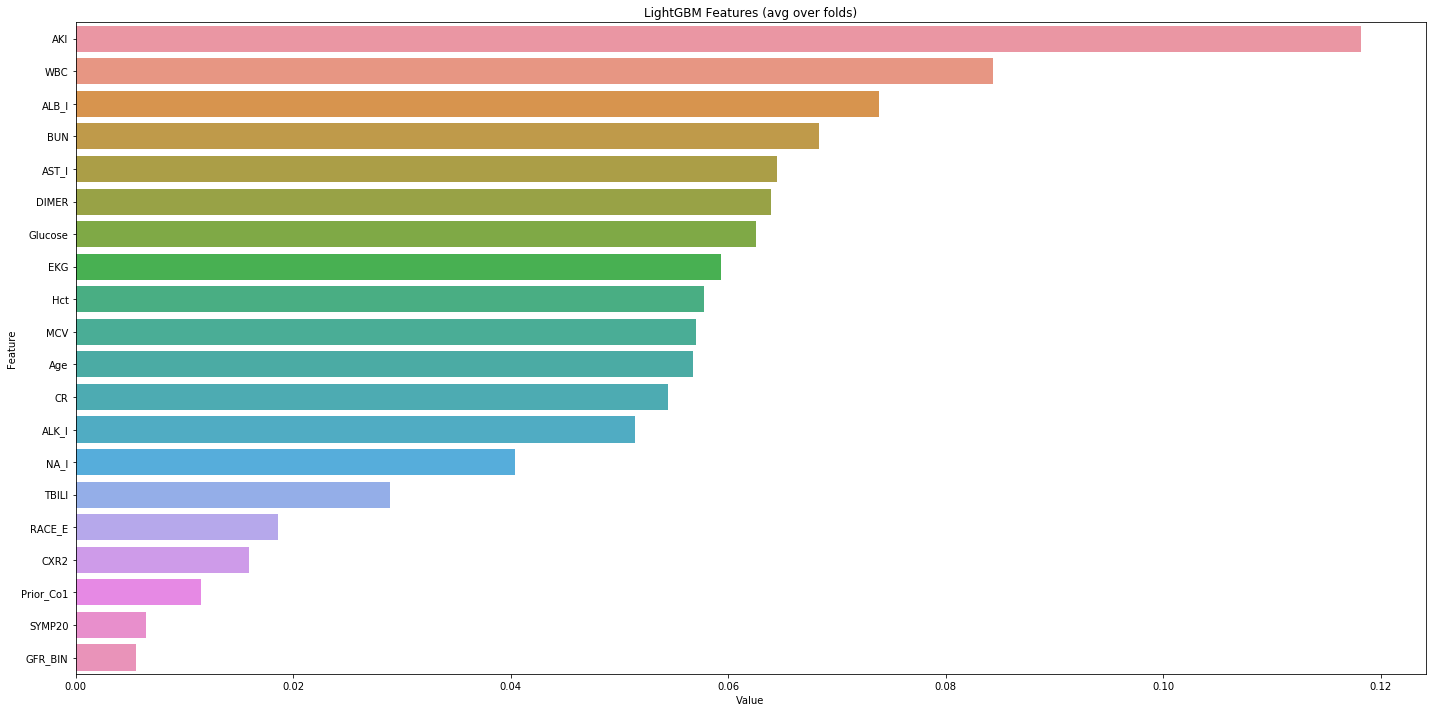

<Figure size 432x288 with 0 Axes>

In [32]:
# code reference from https://www.kaggle.com/ashishpatel26/feature-importance-of-lightgbm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [33]:
importances = model.feature_importances_
std = np.std([model.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[f], importances[indices[f]]))

Feature ranking:
1. feature 0 AKI (0.118226)
2. feature 19 ALB_I (0.084348)
3. feature 1 ALK_I (0.073907)
4. feature 5 AST_I (0.068405)
5. feature 3 Age (0.064469)
6. feature 8 BUN (0.063907)
7. feature 11 CR (0.062535)
8. feature 9 CXR2 (0.059353)
9. feature 12 DIMER (0.057783)
10. feature 13 EKG (0.057052)
11. feature 4 GFR_BIN (0.056766)
12. feature 6 Glucose (0.054470)
13. feature 2 Hct (0.051409)
14. feature 14 MCV (0.040364)
15. feature 18 NA_I (0.028885)
16. feature 16 Prior_Co1 (0.018608)
17. feature 7 RACE_E (0.015923)
18. feature 15 SYMP20 (0.011516)
19. feature 17 TBILI (0.006476)
20. feature 10 WBC (0.005599)
